In [147]:
#importing 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import os
import numpy as np
import sklearn
from sklearn import linear_model
from sklearn.utils import shuffle
import matplotlib.pyplot as plt
#from matplotlib import style
import pickle

In [148]:
#style.use("ggplot")

In [149]:
data = pd.read_csv("student-por.csv", sep=";")
#Reading our csv file and since our data is seperated by semicolons we need to use (sep = ";")

In [150]:
data = data.dropna()

In [151]:
data.head(100)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,GP,F,15,R,GT3,T,1,1,at_home,other,...,3,1,2,1,1,1,4,13,13,13
96,GP,M,16,R,GT3,T,4,3,services,other,...,3,3,3,1,1,4,6,9,11,11
97,GP,F,16,U,GT3,T,2,1,other,other,...,4,3,5,1,1,5,0,13,12,12
98,GP,F,16,U,GT3,T,4,4,other,other,...,5,3,4,1,2,1,4,12,13,13


In [152]:
#Numbers of students by Gender.
grouped_df = data.groupby( ["sex"] )
pd.DataFrame(grouped_df.size().reset_index(name = "Count"))

,sex,Count
0,F,383
1,M,266


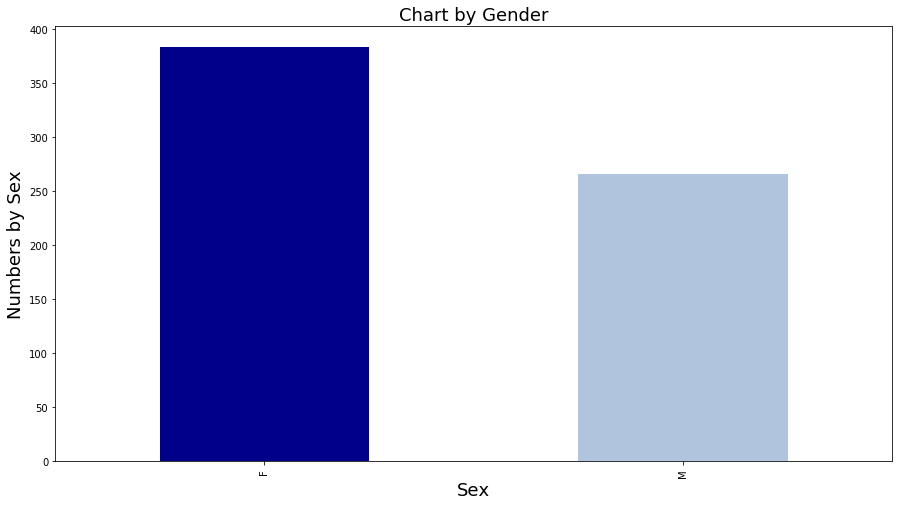

<Figure size 432x288 with 0 Axes>

In [153]:
##Barchat showing the Numbers by Gender
plt.figure(figsize=(15,8))
grouped_df = data.groupby( ["sex"] )
data.groupby(["sex"]).size().plot(kind="bar",color = ['darkblue','lightsteelblue','#00E28E','#00FF80'])

#Labeling the graph with X,Y coordinates,titles and displaying with proper layout
plt.title("Chart by Gender",fontsize=18, color='black')
plt.ylabel("Numbers by Sex",fontsize=18, color='black')
plt.xlabel("Sex",fontsize = 18, color = 'black')
plt.show()
plt.tight_layout()

In [154]:
#Numbers of students by age group.
grouped_age_df = data.groupby( ["age"] )
pd.DataFrame(grouped_age_df.size().reset_index(name = "Count"))

,age,Count
0,15,112
1,16,177
2,17,179
3,18,140
4,19,32
5,20,6
6,21,2
7,22,1


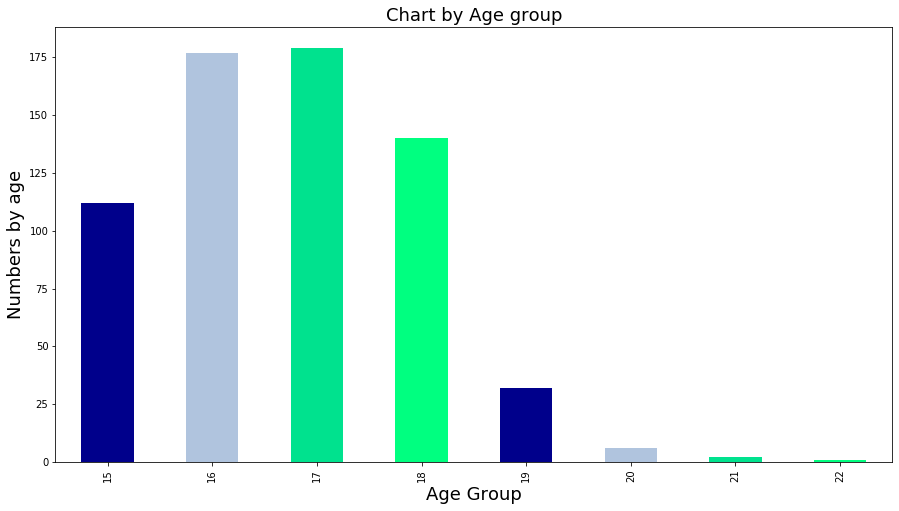

<Figure size 432x288 with 0 Axes>

In [155]:
##Barchat showing the age group
plt.figure(figsize=(15,8))
grouped_age_df = data.groupby( ["age"] )
data.groupby(["age"]).size().plot(kind="bar",color = ['darkblue','lightsteelblue','#00E28E','#00FF80'])

#Labeling the graph with X,Y coordinates,titles and displaying with proper layout
plt.title("Chart by Age group",fontsize=18, color='black')
plt.ylabel("Numbers by age",fontsize=18, color='black')
plt.xlabel("Age Group",fontsize = 18, color = 'black')
plt.show()
plt.tight_layout()

In [156]:
#Label final grade. This is the value we would like to predict.
predict = "G3"

In [157]:
#selecting features to predic label
data = data[["G1", "G2", "absences","failures", "studytime","G3"]]
#data = shuffle(data) 

In [158]:
data.head(100)

,G1,G2,absences,failures,studytime,G3
0,0,11,4,0,2,11
1,9,11,2,0,2,11
2,12,13,6,0,2,12
3,14,14,0,0,3,14
4,11,13,0,0,2,13
...,...,...,...,...,...,...
95,13,13,4,0,4,13
96,9,11,6,0,1,11
97,13,12,0,0,2,12
98,12,13,4,0,1,13


In [159]:
x = np.array(data.drop([predict], 1)) # Features needed in an array and dropping G3.
y =np.array(data[predict]) # Labels

In [160]:
# TRAIN MODEL MULTIPLE TIMES FOR BEST SCORE
#Implementing the Model
best = 0
for _ in range(5000):
    #splitting our dataset into train and test
    x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.1)

    linear = linear_model.LinearRegression()

    linear.fit(x_train, y_train)
    acc = linear.score(x_test, y_test)
    print("Accuracy: " + str(acc))

    if acc > best:
        best = acc
        #Using pickele to save our best model
        with open("studentgrades.pickle", "wb") as f:
            pickle.dump(linear, f)

Accuracy: 0.7462770253571251
Accuracy: 0.8817271858481207
Accuracy: 0.8540056754032608
Accuracy: 0.818210526633897
Accuracy: 0.8823468652899544
Accuracy: 0.7824745690320662
Accuracy: 0.8930208859158072
Accuracy: 0.8384839942410924
Accuracy: 0.7923971391975311
Accuracy: 0.8840019822180054
Accuracy: 0.7085240786599358
Accuracy: 0.8667344288988488
Accuracy: 0.9025543793492746
Accuracy: 0.9122004631188122
Accuracy: 0.9013184871036749
Accuracy: 0.9227164568859442
Accuracy: 0.750527853899692
Accuracy: 0.8171854561469587
Accuracy: 0.8253240406085776
Accuracy: 0.7462960281310673
Accuracy: 0.8773556427687035
Accuracy: 0.7636562959174004
Accuracy: 0.7842397683250208
Accuracy: 0.8545096042997868
Accuracy: 0.896123041344969
Accuracy: 0.8410099460384581
Accuracy: 0.8382692539298575
Accuracy: 0.6965854006447614
Accuracy: 0.896564313742915
Accuracy: 0.9259901746509208
Accuracy: 0.804759224444318
Accuracy: 0.7873126099479082
Accuracy: 0.9117546543818834
Accuracy: 0.8035483452333751
Accuracy: 0.7792615

Accuracy: 0.911227807489341
Accuracy: 0.8561542902641782
Accuracy: 0.8482399129705948
Accuracy: 0.9269550643991326
Accuracy: 0.9017769322839568
Accuracy: 0.695372452371211
Accuracy: 0.8264076687087281
Accuracy: 0.7835479305407497
Accuracy: 0.7545827652065942
Accuracy: 0.9274304652370364
Accuracy: 0.9053498946520379
Accuracy: 0.9015169197601245
Accuracy: 0.8495528593438582
Accuracy: 0.864952413505413
Accuracy: 0.8652843400231249
Accuracy: 0.9191873847159187
Accuracy: 0.8973796818293353
Accuracy: 0.8690400463698403
Accuracy: 0.849297332718883
Accuracy: 0.82952385338531
Accuracy: 0.7497576131383655
Accuracy: 0.8657583300535193
Accuracy: 0.8656370755002017
Accuracy: 0.9065793406625083
Accuracy: 0.8315906333374599
Accuracy: 0.7437366024602358
Accuracy: 0.880747375582624
Accuracy: 0.6447772002842366
Accuracy: 0.8696909682489466
Accuracy: 0.7489190221396401
Accuracy: 0.8940709060827092
Accuracy: 0.9185650242916519
Accuracy: 0.8375094684994514
Accuracy: 0.91711811266441
Accuracy: 0.76836448798

Accuracy: 0.8547490828056601
Accuracy: 0.7586988520657295
Accuracy: 0.7788502147254338
Accuracy: 0.8136845304815283
Accuracy: 0.8981260286328863
Accuracy: 0.8667189607597524
Accuracy: 0.9207624223088274
Accuracy: 0.9193307799526824
Accuracy: 0.854814517195348
Accuracy: 0.8672514927439062
Accuracy: 0.7964118730297607
Accuracy: 0.7699265215584485
Accuracy: 0.8286278834101921
Accuracy: 0.7382665504260189
Accuracy: 0.7004751850208037
Accuracy: 0.8176146597659577
Accuracy: 0.7579968900488763
Accuracy: 0.8537334521856982
Accuracy: 0.925892166439167
Accuracy: 0.7993459372530037
Accuracy: 0.919915084163365
Accuracy: 0.7357466169170034
Accuracy: 0.7825493471225893
Accuracy: 0.9353034865944034
Accuracy: 0.8892529385242365
Accuracy: 0.8905905180518875
Accuracy: 0.8891303556584662
Accuracy: 0.7196666910622855
Accuracy: 0.7582326613785881
Accuracy: 0.8918465822621622
Accuracy: 0.9064815427375071
Accuracy: 0.8883521998231353
Accuracy: 0.8627502011933128
Accuracy: 0.907268707842291
Accuracy: 0.853974

Accuracy: 0.9378454517112493
Accuracy: 0.8896543156792414
Accuracy: 0.7222958057086202
Accuracy: 0.7866819197914916
Accuracy: 0.8970054540229098
Accuracy: 0.9262046282218379
Accuracy: 0.9188978879845904
Accuracy: 0.8050257483494241
Accuracy: 0.8536046115361203
Accuracy: 0.8599805604817949
Accuracy: 0.7848983452289995
Accuracy: 0.9530282614550193
Accuracy: 0.9213481846297605
Accuracy: 0.9092989797260902
Accuracy: 0.8900787621899876
Accuracy: 0.8426945877216722
Accuracy: 0.9017580412913986
Accuracy: 0.8819225901554493
Accuracy: 0.9306858375790817
Accuracy: 0.9436792446424574
Accuracy: 0.9369689108176706
Accuracy: 0.91001168893853
Accuracy: 0.8178698314170819
Accuracy: 0.8708214179222613
Accuracy: 0.8994425666766954
Accuracy: 0.9275494017146046
Accuracy: 0.8217176376223598
Accuracy: 0.8367090823700469
Accuracy: 0.8456426604702532
Accuracy: 0.8513912458927926
Accuracy: 0.7547672578018956
Accuracy: 0.8712222590625188
Accuracy: 0.7508356498401555
Accuracy: 0.9363473027036713
Accuracy: 0.8837

Accuracy: 0.936848745828337
Accuracy: 0.7574241435145943
Accuracy: 0.8437511690970708
Accuracy: 0.931079632752645
Accuracy: 0.7563953637602534
Accuracy: 0.8487647619909576
Accuracy: 0.7059147455153773
Accuracy: 0.8693575800628561
Accuracy: 0.7558172418371804
Accuracy: 0.8065724022161129
Accuracy: 0.8152593415505553
Accuracy: 0.930661363811976
Accuracy: 0.9458609576203296
Accuracy: 0.8166979123241851
Accuracy: 0.8620443338988664
Accuracy: 0.8683621253357213
Accuracy: 0.9151373312996791
Accuracy: 0.8883098196385069
Accuracy: 0.8167921425051505
Accuracy: 0.8069940170758247
Accuracy: 0.8612912456160031
Accuracy: 0.8859480042164045
Accuracy: 0.9261934474158358
Accuracy: 0.9006210053997157
Accuracy: 0.8344641018246433
Accuracy: 0.7099710640390992
Accuracy: 0.9125642666657583
Accuracy: 0.8808595962248136
Accuracy: 0.8729990575905919
Accuracy: 0.9107353753546003
Accuracy: 0.81016676658957
Accuracy: 0.896841751480495
Accuracy: 0.9225103608852214
Accuracy: 0.8550028685531588
Accuracy: 0.89721685

Accuracy: 0.805760087035909
Accuracy: 0.8320744097988425
Accuracy: 0.9220527966198421
Accuracy: 0.9143418189405185
Accuracy: 0.7612460110647652
Accuracy: 0.7241479023294677
Accuracy: 0.9450671173336892
Accuracy: 0.8853118066597199
Accuracy: 0.7262050622743628
Accuracy: 0.7055477868424622
Accuracy: 0.7776449271627935
Accuracy: 0.8730602986452084
Accuracy: 0.752569209510551
Accuracy: 0.9049992332005864
Accuracy: 0.7971110173827359
Accuracy: 0.8046000426709361
Accuracy: 0.8319413082792184
Accuracy: 0.8270711122559574
Accuracy: 0.891013370744714
Accuracy: 0.744699438106084
Accuracy: 0.8655889156016252
Accuracy: 0.8079994845901576
Accuracy: 0.8619846857755114
Accuracy: 0.8534750951631265
Accuracy: 0.8755497360646385
Accuracy: 0.7697113933154186
Accuracy: 0.862753094513469
Accuracy: 0.8652041407345918
Accuracy: 0.9044496715818142
Accuracy: 0.9366267145826156
Accuracy: 0.8162954637529413
Accuracy: 0.7757960332863305
Accuracy: 0.9078891783942276
Accuracy: 0.9345961503434996
Accuracy: 0.8922503

Accuracy: 0.9009150776671602
Accuracy: 0.8653754680175743
Accuracy: 0.905338998558448
Accuracy: 0.8627318782531803
Accuracy: 0.7699606238113523
Accuracy: 0.8248928347022126
Accuracy: 0.7619268286894353
Accuracy: 0.8634763511558144
Accuracy: 0.7850837473249642
Accuracy: 0.8096954986544719
Accuracy: 0.768308230036287
Accuracy: 0.918934062863741
Accuracy: 0.8457991888715046
Accuracy: 0.7600539162581266
Accuracy: 0.8750061097404744
Accuracy: 0.9263677080684752
Accuracy: 0.9111646975030246
Accuracy: 0.8867150360630737
Accuracy: 0.9057501485559053
Accuracy: 0.9310123951795224
Accuracy: 0.7984998013179015
Accuracy: 0.8361125620654065
Accuracy: 0.6917111487687168
Accuracy: 0.7576912280591386
Accuracy: 0.8099867941402115
Accuracy: 0.8225671946044862
Accuracy: 0.8442127432837531
Accuracy: 0.8227194047712364
Accuracy: 0.8345168517694329
Accuracy: 0.8600778744330373
Accuracy: 0.7775242834355952
Accuracy: 0.8512505968157243
Accuracy: 0.7761020065990375
Accuracy: 0.8226666431746946
Accuracy: 0.83874

Accuracy: 0.9186044942498935
Accuracy: 0.8924260028992612
Accuracy: 0.8168956346729569
Accuracy: 0.8383450532865389
Accuracy: 0.8153474140848678
Accuracy: 0.8158681300203559
Accuracy: 0.9314369435628019
Accuracy: 0.9372273632224372
Accuracy: 0.7518978138793546
Accuracy: 0.7597471046887958
Accuracy: 0.8688045040012762
Accuracy: 0.9304132218434937
Accuracy: 0.8295893347758679
Accuracy: 0.9290086974544401
Accuracy: 0.869665440308979
Accuracy: 0.9260119382922181
Accuracy: 0.8538057884600803
Accuracy: 0.8393043233249613
Accuracy: 0.7895556381090179
Accuracy: 0.7717981753923351
Accuracy: 0.8476911997538056
Accuracy: 0.8727635846672896
Accuracy: 0.7828920001076275
Accuracy: 0.9221846452051808
Accuracy: 0.7070826596798817
Accuracy: 0.8380432990517493
Accuracy: 0.9443812347996453
Accuracy: 0.8059760226192103
Accuracy: 0.8116205762532246
Accuracy: 0.6895428438162792
Accuracy: 0.8792307316327395
Accuracy: 0.7856001679883822
Accuracy: 0.6998542889439108
Accuracy: 0.8609819924641239
Accuracy: 0.897

Accuracy: 0.9266047681756147
Accuracy: 0.8426400513249599
Accuracy: 0.727489495521664
Accuracy: 0.8678048689013126
Accuracy: 0.8598307481803726
Accuracy: 0.9433825995885148
Accuracy: 0.9170519561318915
Accuracy: 0.8626065348628545
Accuracy: 0.7628506231925375
Accuracy: 0.8053891238850558
Accuracy: 0.837105552384415
Accuracy: 0.7605978237800894
Accuracy: 0.8259210197884266
Accuracy: 0.8677360098946578
Accuracy: 0.8268085186467617
Accuracy: 0.8342714412880703
Accuracy: 0.7729726359389076
Accuracy: 0.9352198773041471
Accuracy: 0.9101417893016442
Accuracy: 0.7798916569793788
Accuracy: 0.7852615597972423
Accuracy: 0.8744862501131515
Accuracy: 0.7823668419321299
Accuracy: 0.8328157186796641
Accuracy: 0.888766394086702
Accuracy: 0.7701369984087109
Accuracy: 0.8820138473399575
Accuracy: 0.800136248317445
Accuracy: 0.8644604001926741
Accuracy: 0.9527519792655095
Accuracy: 0.8607086493564402
Accuracy: 0.9209621719981496
Accuracy: 0.8145728251774004
Accuracy: 0.8118586428706526
Accuracy: 0.747250

Accuracy: 0.8885163317161463
Accuracy: 0.8658852886685782
Accuracy: 0.8177002054862615
Accuracy: 0.9396567049227194
Accuracy: 0.8740254582697231
Accuracy: 0.8808497779029125
Accuracy: 0.8043744449495438
Accuracy: 0.8005222428145586
Accuracy: 0.8670369599001209
Accuracy: 0.8962472047577474
Accuracy: 0.7413910606570522
Accuracy: 0.8620378566322505
Accuracy: 0.8135417299761694
Accuracy: 0.9033182428124753
Accuracy: 0.7999912502528295
Accuracy: 0.9195386828199491
Accuracy: 0.8561390064898878
Accuracy: 0.9415496149742872
Accuracy: 0.8069229555714533
Accuracy: 0.8463351859540302
Accuracy: 0.7301099384669631
Accuracy: 0.9012004116159957
Accuracy: 0.8293970503352912
Accuracy: 0.8081449157749796
Accuracy: 0.7721610660276876
Accuracy: 0.7884828415650482
Accuracy: 0.8957405079325196
Accuracy: 0.8475430036679723
Accuracy: 0.8278739352439666
Accuracy: 0.8587973291233333
Accuracy: 0.8506379078830526
Accuracy: 0.8495661388697094
Accuracy: 0.8818263044204555
Accuracy: 0.8111723203928223
Accuracy: 0.92

Accuracy: 0.7094315557055613
Accuracy: 0.6709983245585507
Accuracy: 0.7225846838097386
Accuracy: 0.9127775621175865
Accuracy: 0.9247945631835174
Accuracy: 0.9078420268724634
Accuracy: 0.825001129562582
Accuracy: 0.8443676236585449
Accuracy: 0.7889302972227907
Accuracy: 0.7425838851603004
Accuracy: 0.7864154011631063
Accuracy: 0.859086088063829
Accuracy: 0.8655238375356529
Accuracy: 0.8248722098114964
Accuracy: 0.8651303198219514
Accuracy: 0.8588945582356804
Accuracy: 0.8297779102095915
Accuracy: 0.7983952904209937
Accuracy: 0.7869471153724596
Accuracy: 0.9055162369228796
Accuracy: 0.869500663499286
Accuracy: 0.8494629738751348
Accuracy: 0.928179961579941
Accuracy: 0.9206085650233629
Accuracy: 0.8871769992661218
Accuracy: 0.9117785746861515
Accuracy: 0.8427084566015947
Accuracy: 0.9344350271840486
Accuracy: 0.8425921820192511
Accuracy: 0.854270470419389
Accuracy: 0.8876604245886903
Accuracy: 0.8996591654494557
Accuracy: 0.816970571134039
Accuracy: 0.8869256691932322
Accuracy: 0.82241121

Accuracy: 0.8158862407080448
Accuracy: 0.7161090194719293
Accuracy: 0.8974133343856933
Accuracy: 0.9195061284976996
Accuracy: 0.8341432844211203
Accuracy: 0.7901957791151503
Accuracy: 0.6708166715329604
Accuracy: 0.8815000361233654
Accuracy: 0.8728982465959133
Accuracy: 0.894274839063738
Accuracy: 0.8075853813935001
Accuracy: 0.831538422412849
Accuracy: 0.8351802337140233
Accuracy: 0.9328166022478307
Accuracy: 0.8504727956295947
Accuracy: 0.9116084339195194
Accuracy: 0.8608885824423633
Accuracy: 0.785677322758457
Accuracy: 0.8091011220644968
Accuracy: 0.8695922550327505
Accuracy: 0.6939233603429418
Accuracy: 0.9062063484696913
Accuracy: 0.5965111748896542
Accuracy: 0.9073518301945873
Accuracy: 0.828413815198721
Accuracy: 0.8756125465762082
Accuracy: 0.8329562217310166
Accuracy: 0.8641333546820374
Accuracy: 0.8345866033675808
Accuracy: 0.8518625124583317
Accuracy: 0.8583055881208971
Accuracy: 0.869548439793864
Accuracy: 0.813630630619047
Accuracy: 0.7620220464474797
Accuracy: 0.87994832

Accuracy: 0.7634043521066198
Accuracy: 0.8315661888101042
Accuracy: 0.8003867927797914
Accuracy: 0.9255655758265953
Accuracy: 0.8104476537842882
Accuracy: 0.9249519874906045
Accuracy: 0.8138070440628421
Accuracy: 0.8576496385836307
Accuracy: 0.823583027796425
Accuracy: 0.7921309801174529
Accuracy: 0.873068366949124
Accuracy: 0.8427929597559537
Accuracy: 0.883460791830971
Accuracy: 0.7852029259840914
Accuracy: 0.7644505247594433
Accuracy: 0.8210506223034253
Accuracy: 0.8060969525577183
Accuracy: 0.804919458359036
Accuracy: 0.9129390582647332
Accuracy: 0.7875720611372582
Accuracy: 0.7700090075281993
Accuracy: 0.8242640035048515
Accuracy: 0.8031736956158323
Accuracy: 0.8684969161909011
Accuracy: 0.8559305895396447
Accuracy: 0.8486635983718552
Accuracy: 0.7987965020774002
Accuracy: 0.696877796035005
Accuracy: 0.8167647762927981
Accuracy: 0.878140444120721
Accuracy: 0.9087834821439761
Accuracy: 0.8324899254939768
Accuracy: 0.8196459448283306
Accuracy: 0.7703922844963049
Accuracy: 0.90165729

Accuracy: 0.8806301292976139
Accuracy: 0.9061458846737968
Accuracy: 0.8389122344008503
Accuracy: 0.8857049972320395
Accuracy: 0.8690625245769823
Accuracy: 0.9335749514830771
Accuracy: 0.7062646963437427
Accuracy: 0.8354437474899573
Accuracy: 0.917741530100765
Accuracy: 0.8266752943076228
Accuracy: 0.9253905368318707
Accuracy: 0.846464425392911
Accuracy: 0.8345042655026226
Accuracy: 0.8748525994575329
Accuracy: 0.8642104850871717
Accuracy: 0.8416346458791569
Accuracy: 0.761998953512407
Accuracy: 0.9423872258550513
Accuracy: 0.8035552620026215
Accuracy: 0.9148322638742113
Accuracy: 0.8789208591665458
Accuracy: 0.7051392171822863
Accuracy: 0.7089127745653799
Accuracy: 0.8772599639891514
Accuracy: 0.8916481684945767
Accuracy: 0.8892368352271289
Accuracy: 0.8218832390027746
Accuracy: 0.865169479064932
Accuracy: 0.8693800665072939
Accuracy: 0.8373001966874136
Accuracy: 0.7962554749122135
Accuracy: 0.9252133275882561
Accuracy: 0.9263549280622304
Accuracy: 0.9265458463481014
Accuracy: 0.958959

Accuracy: 0.9014290598889672
Accuracy: 0.9158570756773985
Accuracy: 0.9313608535918911
Accuracy: 0.8897844608687885
Accuracy: 0.7933795487244286
Accuracy: 0.8945354785769509
Accuracy: 0.7757813666646959
Accuracy: 0.7982051728574959
Accuracy: 0.902999796509126
Accuracy: 0.9401629455727908
Accuracy: 0.8581020042506475
Accuracy: 0.8277687515626209
Accuracy: 0.9581011391036581
Accuracy: 0.8324168391590003
Accuracy: 0.8810181559036426
Accuracy: 0.871917466178699
Accuracy: 0.9156742175131994
Accuracy: 0.8122027148807784
Accuracy: 0.9382596261416397
Accuracy: 0.7189954358812631
Accuracy: 0.783808254159324
Accuracy: 0.9188555962129542
Accuracy: 0.8161272177746846
Accuracy: 0.8220690715872471
Accuracy: 0.9233714006692019
Accuracy: 0.9141890260963594
Accuracy: 0.8473294054543024
Accuracy: 0.9020874834184749
Accuracy: 0.8639032067818938
Accuracy: 0.7944614819867036
Accuracy: 0.7750158276579345
Accuracy: 0.8846979953347687
Accuracy: 0.9088151062567273
Accuracy: 0.8530773560353577
Accuracy: 0.85703

In [161]:
# LOAD MODEL
pickle_in = open("studentgrades.pickle", "rb")
linear = pickle.load(pickle_in)

In [162]:
print("-------------------------")
print('Coefficient: \n', linear.coef_)
print('Intercept: \n', linear.intercept_)
print(best)
print("-------------------------")


-------------------------
Coefficient: 
 [ 0.13737825  0.88558201  0.02502765 -0.2233955   0.10084823]
Intercept: 
 -0.14627062660135515
0.9627434964138005
-------------------------


In [163]:
predicted= linear.predict(x_test)
for x in range(len(predicted)):
    print(predicted[x], x_test[x], y_test[x])

10.184180140585038 [10 10  0  0  1] 10
11.345066352135174 [10 11 11  0  1] 11
8.338480871584316 [8 8 8 0 1] 9
9.801537806880422 [11 10  6  3  1] 11
14.715206477967564 [15 14  4  0  3] 15
15.462672631558576 [14 15  8  0  2] 16
11.44462925942448 [12 11  4  0  1] 11
14.289546448628277 [13 14  2  0  2] 14
9.26133050608468 [9 9 4 0 1] 10
15.449884948095743 [15 15  2  0  2] 15
15.462672631558576 [14 15  8  0  2] 16
15.211658474037574 [14 15  2  0  1] 17
12.38026657738767 [12 12  6  0  1] 12
11.308536335003083 [ 9 11 11  0  2] 10
7.940664276704151 [ 9  7 22  0  1] 6
11.385094517714196 [ 9 11  6  0  4] 11
13.353909130665086 [13 13  0  0  2] 10
11.394573949738492 [12 11  2  0  1] 12
14.23949113894229 [13 14  0  0  2] 13
10.046801894989908 [ 9 10  0  0  1] 9
8.791534775934682 [7 9 6 2 3] 10
14.51424763013255 [15 14  0  0  2] 15
11.134648429820498 [11 11  2  1  2] 11
11.408099242292389 [11 11  4  0  2] 11
10.184180140585038 [10 10  0  0  1] 10
11.795754036317453 [12 11 14  0  2] 11
12.43236517488

In [164]:
predicted_df=pd.Series(y_test[x])


In [165]:
predicted_df.head(100)

0    7
dtype: int64

No handles with labels found to put in legend.


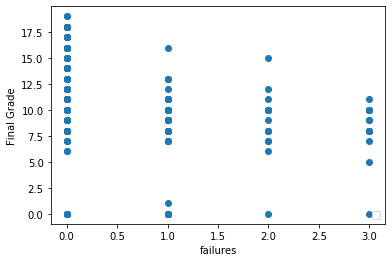

In [166]:
# Drawing and plotting model
plot = "failures"
plt.scatter(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()

No handles with labels found to put in legend.


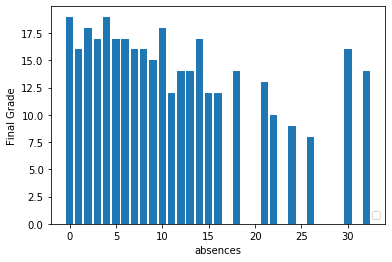

In [167]:
# Drawing and plotting model
plot = "absences"
plt.bar(data[plot], data["G3"])
plt.legend(loc=4)
plt.xlabel(plot)
plt.ylabel("Final Grade")
plt.show()